<a href="https://colab.research.google.com/github/RicardoR002/NLP-CAI2300C/blob/main/IMDB_Sentiment_Analysis_RR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Loading the IMDB Dataset

Ricardo Ruano CAI2300C

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CAI2300C/IMDB Dataset.csv')
df.sample(5)

#  IMDB movie reviews dataset contains 50,000 movie reviews labeled as either positive or negative.

,review,sentiment
25203,A truly excellent look at the world and the re...,positive
48116,"this is my first review on IMDb, i didn't real...",positive
46100,One of the worst films I have ever seen! After...,negative
17837,I thought this was a very good movie. It would...,positive
41531,If you're looking for an original horror flick...,positive


## 2. Data Cleaning and Preprocessing

In [ ]:
# Remove special characters, convert everything to lowercase, and tokenize the text.
# Text Cleaning and Tokenization
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower().strip()

# Clean the reviews
df['review'] = df['review'].apply(clean_text)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=200)

## 3. Converting Labels to Numeric Format

In [ ]:
# We need to convert the positive and negative labels into binary values.
# Convert sentiment labels to binary
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Splitting the data into features (X) and labels (y)
X = padded_sequences
y = df['sentiment'].values

## 4. Splitting the Data into Training and Testing Sets

In [ ]:
# We’ll use an 80:20 split to separate the data into training and testing sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Building the Neural Network with TensorFlow

In [ ]:
# We’ll create a simple neural network with an Embedding layer, followed by two LSTM layers, and a Dense output layer.
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=200),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 170s 167ms/step - accuracy: 0.6852 - loss: 0.5806 - val_accuracy: 0.8244 - val_loss: 0.4028
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 197s 162ms/step - accuracy: 0.8435 - loss: 0.3738 - val_accuracy: 0.7941 - val_loss: 0.4465
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 199s 159ms/step - accuracy: 0.8801 - loss: 0.3003 - val_accuracy: 0.8577 - val_loss: 0.3408
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 172s 172ms/step - accuracy: 0.9029 - loss: 0.2523 - val_accuracy: 0.8687 - val_loss: 0.3273
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 160s 160ms/step - accuracy: 0.9251 - loss: 0.2083 - val_accuracy: 0.8677 - val_loss: 0.3405
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 161s 161ms/step - accuracy: 0.9379 - loss: 0.1759 - val_accuracy: 0.8644 - val_loss: 0.3838
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 200s 159ms/step - accuracy: 0.9512 - loss: 0.1428 - val_accuracy: 0.8650 - val_loss: 0.4333
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 163s 163ms/step - ac

## 6. Visualizing Model Performance

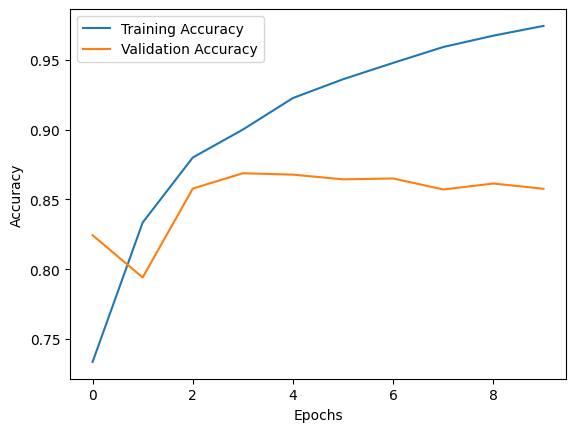

In [ ]:
# We can use Matplotlib to plot the training and validation accuracy over epochs.
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 7. Evaluating the Model

In [ ]:
# Let’s evaluate our model on the test data to see how well it generalizes.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8532 - loss: 0.4647
Test Accuracy: 0.86


## 8. Making Predictions

In [ ]:
# We can use our model to predict the sentiment of new movie reviews.
sample_reviews = [
    "I absolutely loved this movie! The plot was thrilling and the characters were so well developed.",
    "The film was a disaster. Poor acting and a predictable storyline."
]

sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, maxlen=200)

predictions = model.predict(sample_padded)
print(["Positive" if prob > 0.5 else "Negative" for prob in predictions])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
['Positive', 'Negative']
